<a href="https://colab.research.google.com/github/emilianog4/Data-Science-Projects/blob/main/Simulaci%C3%B3n_de_variables_aleatorias_discretas_y_modelos_de_distribuci%C3%B3n_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de variables aleatorias discretas y modelos de distribución de probabilidad

En este *notebook* estudiaremos dos enfoques para el estudio de las variables aleatorias:

- Calcular probabilidades y distribuciones a mano, de forma exacta, usando la teoría de probabilidades que estudiamos y utilizando Python como "calculadora".

- Simular el experimento y/o las distribuciones y calcular y/o estimar las probabilidades a partir de la frecuencia relativa.

Esta semana no habrá Trabajo de Simulación porque es posible que estén terminando el Trabajo de Simulación 1 por estos días. Nos reservamos la simulación de variables aleatorias para el Trabajo de Simulación 2, que veremos recién en la próxima posta (variables aleatorias continuas). Sin embargo, al final de este *notebook* encontrarás una visualización de la aproximación de la binomial a la Poisson y ver, empíricamente, aquello que estudiamos desde la teoría.

## Cálculo de probabilidades

Comenzaremos esta sección calculando "a mano" algunas probabilidades que surgen de ejercicios similares a los del Libro y la Práctica 2. Sin embargo, antes de empezar, conviene cargar módulos y librerías que usaremos a lo largo de este notebook.

In [ ]:
# Cargamos las librerías que ya estudiamos en el notebook 1
import numpy as np
import random as rd

# Pero vamos a usar algunas más...
# De scipy importamos stats para poder tener generadores de muestras provenientes
# de las variables aleatorias usuales (https://docs.scipy.org/doc/scipy/reference/stats.html)
from scipy import stats

# E importamos algunas más para poder hacer algunos gráficos útiles
import seaborn as sns
import matplotlib.pyplot as plt

# Fijamos una semilla para que todo sea reproducible
rd.seed(123)

# Y definimos unos parámetros estéticos de seaborn para que todo luzca mejor
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

# Para evitar que nos aparezcan resultados en notación científica
np.set_printoptions(suppress=True)

### Ejemplo inicial: la variable aleatoria "suma" en el lanzamiento de dos dados

Como sabemos, una variable aleatoria es una *función* que asocia elementos $w$ del espacio muestral $\Omega$ a números. Para terminar de fijar esta idea, recupremos un ejemplo que empezamos a mirar en la posta 1.

Consideremos el experimento de lanzar dos dados equilibrados. El espacio muestral equiprobable y finito más conveniente, como vimos, es
$$\Omega = \{(d_1,d_2) \text{ con } d_1,d_2\in \{1,2,3,4,5,6\}\}.$$ Cada elemento $w$ de $\Omega$ tiene igual probabilidad, es decir:
$$P(w_i)=\frac{1}{36}, \text{ para todo $i$ entre 1 y 36.}$$

Vamos a definir una variable aleatoria $X$ que sea la suma de $d_1+d_2$. ¿Cuál es el rango de esta variable? Es decir, ¿qué valores puede tomar? Es fácil ver que su rango va de 2 a 12, es decir, $$R_X=\{2,3,\ldots,11,12\}.$$

De esta forma, la variable aleatoria $X$ es una *función* que asocia elementos $w$ del espacio muestral $\Omega$ a los números $\{2,3,\ldots,11,12\}$.

Por ejemplo, $X$ asigna el valor $2$ a partir de tomar el elemento $w_1=(1,1)$ de $\Omega$. Es decir,
$$\{X=2\} = \{(1,1)\}.$$

Por otro lado, $X$ asigna el valor $3$ a partir de tomar los elementos $w_2=(2,1)$ y $w_3=(1,2)$ de $\Omega$. Es decir,
$$\{X=3\} = \{(2,1),(2,2)\}.$$

Y podemos repetir esto para todos los valores que asigna $X$ a partir de los elementos de $\Omega$, hasta "agotarlos" todos.

Ahora bien, lo que nos va a interesar es calcular la probabilidad para todos los posibles valores que puede tomar $X$. Pero como cada valor de los que toma $X$ está asociado a elemento/s del espacio muestral cuya probabilidad conocemos, ¡podemos hacerlo sin problemas! Por ejemplo,

$$P(\{X=2\}) = P(\{(1,1)\}) = \frac{1}{36},$$

o bien,

$$P(\{X=3\}) = P(\{(2,1),(1,2)\}) = \frac{2}{36}.$$

Al final, la probabilidad de que $X$ tome cualquier valor de su rango es algo que podemos calcular ¡sin problemas!, pues todo recae en contar cuántos eventos elementales de probabilidad $1/36$ se involucran.

Podemos calcular $P(X=x)$ para todo $x\in R_X$. Hagamos esas cuentas con Python, para evitar contar todos los casos a mano.

In [ ]:
# Armamos los dados
dado1 = range(1,7)
dado2 = range(1,7)

# Armamos la variable que devuelve la suma de todos los elementos de Omega
X = [d1 + d2 for d1 in dado1 for d2 in dado2]
X

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

In [ ]:
# En X tenemos todas las posibles sumas, pero, claro
# ¡hay sumas repetidas! Es decir, diferentes elementos de Omega
# dan lugar a una misma suma.

# Para contarlos, usamos cl de collections
import collections as cl

# En Xcontador guardamos, para cada posible x, cuántas veces apareció
Xcontador = cl.Counter(X)
Xcontador

Counter({2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1})

In [ ]:
# Acá, los ordenamos por cantidad de veces que apareció una suma
Xcuantos = Xcontador.most_common()
Xcuantos.sort()

# Xcuantos guarda un par, con primera componente el valor x de la suma
# y con segunda componente la cantidad de elementos de Omega
# que dieron lugar a ese valor x de la suma
print(Xcuantos)

[(2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 5), (9, 4), (10, 3), (11, 2), (12, 1)]


In [ ]:
# Calculamos las probas
n = len(X)
x = range(0,n+1)
px = [nx[1]/n for nx in Xcuantos]
print("Las probas puntuales son:", np.round(px,5))

Las probas puntuales son: [0.02778 0.05556 0.08333 0.11111 0.13889 0.16667 0.13889 0.11111 0.08333
 0.05556 0.02778]


¿Qué hicimos en el código anterior?

Calculamos las probabilidades puntuales $P(X=x)$ para todo $x\in R_X$ para la variable aleatoria $X$ que **construimos** a partir de un **experimento aleatorio**. ¿Cómo lo hicimos? Similar a cómo trabajamos en la posta anterior, cuando solo sabíamos calcular probabilidades en un espacio equiprobable.

¿Para qué usamos Python? Para hacer algo que podríamos haber hecho a mano (¡qué pérdida de tiempo, ufff!). Bueno, no tanto... estudiar la probabilidad de una la variable que resulta de la suma de **DOS** dados es algo que es fácil calcular "a mano", básicamente, porque **no es tan tedioso contarlos manualmente**. Pero si quisiéramos la suma de **TRES** dados... ¡sería bastante más tedioso! En cambio, con el código que acabamos de armar, ¡solo deberíamos agregar un ``dado3`` e incorporarlo a la suma cuando definimos ``X``. ¡Y voilá!

**Te dejamos como inquietud que lo pruebes, y que pruebes, incluso, con la suma de más de tres dados...**

La moraleja de este ejemplo inicial es: ¡podemos definir cualquier variable aleatoria de interés a partir de un experimento y, muy posiblemente, estudiar cómo se distribuye su probabilidad a partir de contar a "cuántos" elementos de un espacio equiprobable "captura"! Y esto vale **SIEMPRE**, para cualquier problema que nos interese abordar.

### Distribución Bernoulli
Sea $X$ la variable aleatoria con distribución Bernoulli de parámetro $p$, siendo $p=P(\text{éxito})$. Es decir $X\sim Be(p), \text{ con } R_X=\{0,1\}$.

#### La simulamos "a mano"

Vamos a simular una distribución Bernoulli con lo que aprendimos en la posta 1. En particular, vamos a simular el lanzamiento de una moneda cargada: con probabilidad $0.7$ sale cara (el evento de interés) y con probabilidad $0.3$ sale cruz. En símbolos:

$$\Omega=\{\text{cara, cruz}\}$$

y definimos la variable aleatoria $X$ que toma el valor $1$ si sale "cara" y 0, si no. Es decir,
$$R_X=\{0,1\},$$
y como la moneda está cargada
$$P(X=0)=P(\text{cruz})=0.3,$$
$$P(X=1)=P(\text{cara})=0.7.$$

Vamos a querer estimar $P(X=1)$ a partir de una simulación.

In [ ]:
#### 1: Experimento aleatorio
moneda = list(range(0,2))

def experimento_moneda_cargada():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado es un número: 1, si éxito; 0, si fracaso
    '''
    resultado = rd.choices(moneda, weights=(0.3,0.7), k=1)
    return resultado

In [ ]:
# La chequeamos
experimento_moneda_cargada()

[0]

In [ ]:
#### 2: Muestra aleatoria
rd.seed(123)
N = 10000
muestra = [experimento_moneda_cargada() for _ in range(N)]

#### 3: Una función _"filtro"_
def sale_cara(resultado):
    return resultado == [1]

#### 4: Aproximamos P(E) por la proporción de elementos de E en la muestra
prob = sum(1 for e in muestra if sale_cara(e))/N
print(f'Probabilidad aproximada de que salga cara, P(X=1), es', prob)

Probabilidad aproximada de que salga cara, P(X=1), es 0.7022


#### La computamos con ``stats``

Está claro que siempre vamos a poder definir variables aleatorias "a mano", sin embargo, es una tarea bastante costosa y sería deseable que existiera alguna forma "económica" de hacerlo. De hecho, eso ocurre con ``stats``: vamos a poder usar diferentes distribuciones que ya vienen precargadas. Comencemos por estudiar la Bernoulli asociada a nuestra moneda cargada.

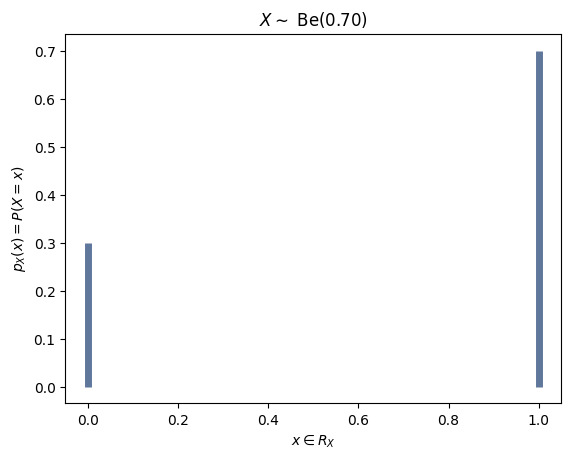

In [ ]:
# Definimos la probabilidad de "éxito" (moneda cargada, que salga cara es 0.7)
p = 0.7

# Definimos la bernoulli
# Para ello, usamos la instrucción stats.bernoulli()
ber = stats.bernoulli(p)

# Rango de X
x = range(0,2)

# Evaluamos la función de probabilidad puntual (fpp) en los x del rango
# Para ello, usamos la instrucción .pmf()
px = ber.pmf(x)

# Hacemos un gráfico de la fpp, vamos a usar la librería matplotlib que importamos como plt
# Este código general lineas verticales en los valores de x,
# que arrancan en 0 y tienen altura px: ¡las "barritas" de la proba puntual
plt.vlines(x, 0, px, colors='C0', lw=5)

# Estos son parámetros estéticos, a gusto
plt.xlabel('$x \in R_X$')
plt.ylabel('$p_X(x)=P(X=x)$')
plt.title(f"$X \sim$ Be(%.2f)" % (p));
# Usamos ; al final para pedir que muestre el gráfico
# También podríamos usar plt.show()

### Distribución binomial
Sea $X$ la variable aleatoria que cuenta la cantidad de éxitos en $n$
repeticiones independientes de un ensayo Bernoulli con probabilidad de éxito $p$. Esta variable $X$ tiene distribución binomial de parámetros $n$ y $p$. Es decir $X\sim Binom(n,p), \text{ con } R_X=\{0,\cdots,n\}$.

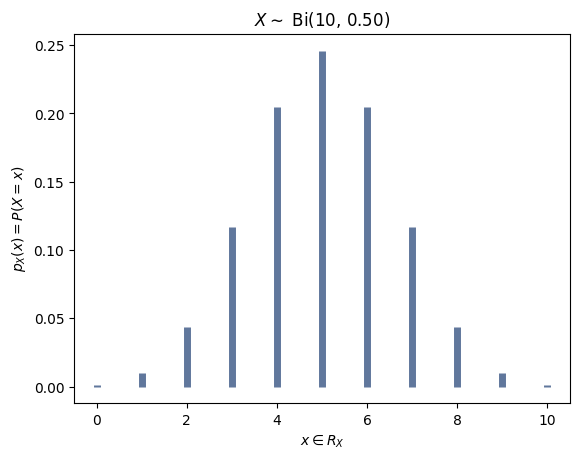

In [ ]:
# Repeticiones independientes
n = 10

# Probabilidad de "éxito"
p = 0.5

# Definimos la binomial
binomial = stats.binom(n, p)

# Rango de X
x = range(0,n+1)

# Evaluamos la función de probabilidad puntual (fpp) en los x del rango
px = binomial.pmf(x)

# Hacemos un gráfico de la fpp
plt.vlines(x, 0, px, colors='C0', lw=5)
plt.xlabel('$x \in R_X$')
plt.ylabel('$p_X(x)=P(X=x)$')
plt.title(f"$X \sim$ Bi(%d, %.2f)" % (n,p));

Podemos visualizar otra binomial, con otros parámetros. Por ejemplo, para el mismo $n$, cambiar $p$ y ver cómo cambia el gráfico de la función de probabilidad puntual. Es decir, **ver cómo cambia la "distribución" de esas "barritas"**.

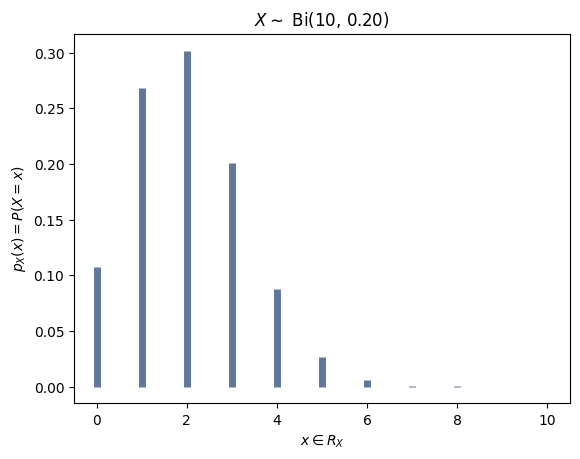

In [ ]:
# Podemos repetir cambiando p y viendo
# cómo afecta eso a las probabilidades puntuales
# Probabilidad de "éxito"
p = 0.2

# Definimos la binomial
binomial = stats.binom(n, p)

# Rango de X
x = range(0,n+1)

# Evaluamos la función de probabilidad puntual (fpp) en los x del rango
px = binomial.pmf(x)

# Hacemos un gráfico de la fpp
plt.vlines(x, 0, px, colors='C0', lw=5)
plt.xlabel('$x \in R_X$')
plt.ylabel('$p_X(x)=P(X=x)$')
plt.title(f"$X \sim$ Bi(%d, %.2f)" % (n,p));

Notemos que, efectivamente, la forma en que se "distribuyen" las barritas en ambos gráficos **no** es la misma: **al variar $p$ aun manteniendo $n$ igual, ¡la distribución de las probabilidades es diferente!**

La variable sigue siendo binomial, pero podemos notar que la probabilidad se concentra mucho más "a la izquierda" cuando $p$ es pequeño, que cuando no lo es.

#### Esperanza y varianza
Con el paquete stats, además de tener las distribuciones y sus funciones de probabilidad, también tenemos sus momentos, en particular: **esperanza y varianza**.

Por ejemplo, con la instrucción ``binomial.stats(moments='mv')`` recuperamos la esperanza y la varianza de la binomial que hayamos definido. Esto ocurrirá de igual forma con todas las distribuciones que miremos con ``stats``.

In [ ]:
esperanza, varianza = binomial.stats(moments='mv')
print(esperanza)
print(varianza)

2.0
1.6


### Distribución Geométrica

Sea $X$ la variable aleatoria que cuenta la cantidad de repeticiones independientes hasta obtener el primer éxito en un ensayo Bernoulli con probabilidad de éxito $p$. Esta variable $X$ tiene distribución geométrica de parámetro $p$. Es decir $X\sim Geom(p), \text{ con } R_X=\mathbb{N}$.

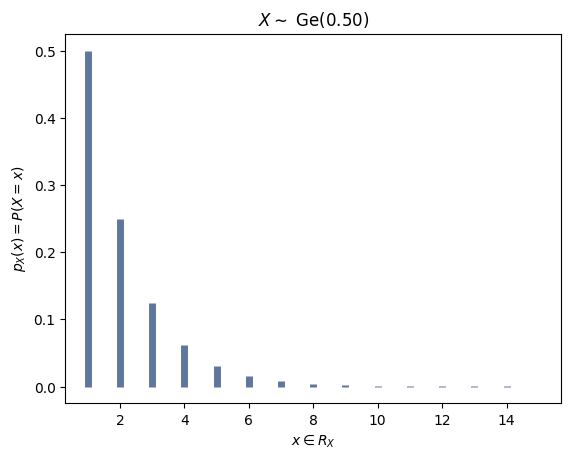

In [ ]:
# Probabilidad de "éxito"
p = 0.5

# Definimos la geometrica
geometrica = stats.geom(p)

# Rango de X (es N, pero como es infinito, podremos solo evaluarla en un rango acotado)
n = 15
x = range(1,n+1)

# Evaluamos la función de probabilidad puntual (fpp) en los x del rango
px = geometrica.pmf(x)

# Hacemos un gráfico de la fpp
plt.vlines(x, 0, px, colors='C0', lw=5)
plt.xlabel('$x \in R_X$')
plt.ylabel('$p_X(x)=P(X=x)$')
plt.title(f"$X \sim$ Ge(%.2f)" % (p));

In [ ]:
esperanza, varianza = geometrica.stats(moments='mv')
print(esperanza)
print(varianza)

2.0
2.0


### Distribución Poisson
Sea $X$ la variable aleatoria Poisson con parámetro de intensidad $\lambda$. Es decir $X\sim Poi(\lambda), \text{ con } R_X=\mathbb{N}_0$.

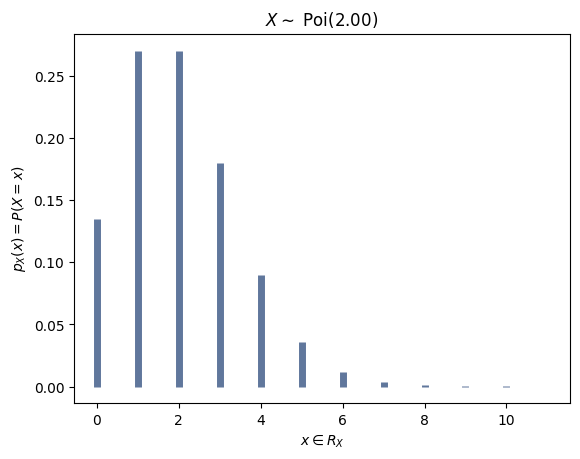

In [ ]:
# Intensidad
lamb = 2

# Definimos la Poisson
poisson = stats.poisson(lamb)

# Rango de X (es N_0, pero como es infinito, podremos solo evaluarla en un rango acotado)
n = 11
x = range(0,n+1)

# Evaluamos la función de probabilidad puntual (fpp) en los x del rango
px = poisson.pmf(x)

# Hacemos un gráfico de la fpp
plt.vlines(x, 0, px, colors='C0', lw=5)
plt.xlabel('$x \in R_X$')
plt.ylabel('$p_X(x)=P(X=x)$')
plt.title(f"$X \sim$ Poi(%.2f)" % (lamb));

In [ ]:
esperanza, varianza = poisson.stats(moments='mv')
print(esperanza)
print(varianza)

2.0
2.0


## Cálculo y estimación de probabilidades con *``stats``*

Consideremos el experimento aleatorio que consiste en lanzar una moneda normal (¡no cargada!) y contar la cantidad de lanzamientos que son necesarios hasta obtener la primera cara.

Es fácil ver que esa variable, $X$, que cuenta la cantidad de lanzamientos que son necesarios hasta obtener la primera cara es una variable con distribución geométrica de parámetro $p=0.5$.

Entonces, algunas cosas que sabemos sobre $X$ son:

- $X\sim Geom(0.5)$,
- $R_X=\mathbb{N}$,
- $p(x)=P(X=x)=0.5\cdot 0.5^{x-1}$ para $x\in R_X$.

Con todo esto, calculemos algunas probabilidades. Por ejemplo, la probabilidad de necesitar exactamente 5 repeticiones. Es decir,
$P(X=5)=0.5\cdot 0.5^{5-1}$.

In [ ]:
p = 0.5
x = 5
p * p**(x-1)

0.03125

O, también, la probabilidad de necesitar a lo sumo 5 repeticiones. Es decir,
$P(X\leq5)=0.5\cdot 0.5^{1-1}+\cdots+0.5\cdot 0.5^{5-1}$.

In [ ]:
p = 0.5
x = 5

Rx = range(1,5+1)
px = [p * p**(x-1) for x in Rx]
sum(px)

0.96875

Como vemos, ¡es muy probable obtener la primera cara en los primeros 5 lanzamientos!

Este tipo de probabilidades, que son acumuladas, también podemos calcularlas con ``stats``. Más precisamente, queremos calcular $P(X\leq x)$ para cualquier $x$ en una distribución dada. Eso será posible con la función ``.cdf()``.

In [ ]:
# P(X<=5), con X dist Geom(0.5)
p = 0.5
x = 5
stats.geom.cdf(x, p)

0.96875

Y, también, podríamos querer estimar esa probabilidad. ¿Cómo? Simulando $N$ repeticiones del experimento de lanzar la moneda y contar cuántas de esas $N$ veces fueron necesarias 5 o menos lanzamientos.

Podemos simular muestras de distribuciones usando la funcion ``.rvs()``. Por ejemplo, simular una muestra $N=1000$ realizaciones de una variable aleatoria geométrica de parámetro 0.5 y observar que cada realización se corresponderá con la cantidad de lanzamientos necesarios hasta obtener la primera cara en cada una de las repeticiones de este imaginario experimento. Hagámoslo.

In [ ]:
N = 1000
p = 0.5
muestra = stats.geom.rvs(p, size=N)
muestra

array([ 2,  2,  1,  2,  2,  2,  1,  4,  1,  3,  1,  2,  1,  2,  1,  2,  1,
        1,  2,  1,  3,  1,  2,  4,  1,  2,  4,  1,  3,  3,  1,  1,  4,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  6,  2,  5,  1,  1,
        1,  2,  9,  4,  2,  1,  1,  3,  4,  1,  1,  1,  1,  1,  3,  4,  2,
        2,  3,  1,  4,  1,  1,  2,  2,  1,  5,  1,  2,  1,  1,  2,  1,  1,
        3,  2,  5,  1,  1,  3,  2,  3,  4,  1,  1,  2,  2,  2,  4,  1,  3,
        1,  1,  1,  1,  2,  1,  6,  1,  2,  1,  3,  4,  2,  2,  2,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  1,  2,  1,  4,  1,  1,  2,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  2,  2,  2,  1,  4,  2,  1,
        1,  1,  1,  2,  1,  4,  1,  1,  3,  2,  2,  2,  2,  1,  1,  3,  3,
        1,  1,  2,  1,  3,  2,  2,  2,  1,  7,  2,  5,  2,  1,  1,  2,  2,
        2,  1,  1,  3,  1,  3,  1,  2,  2,  1,  3,  1,  5,  1,  2,  1,  2,
        3,  2,  2,  1,  1,  1,  2,  3,  1,  1,  4,  1,  4,  1,  1,  6,  1,
        3,  2,  1,  3,  1

Observemos que en ``muestra`` guardamos las ``N`` realizaciones de nuestra variable geométrica. Cada uno de los números que contiene ``muestra`` corresponde cuántos lanzamientos fueron necesarios, en esa realización del experimento aleatorio, hasta obtener la primera cara. Es como tener una lista en donde fuimos anotando la cantidad de veces que tardamos en obtener cara al lanzar ``N`` veces una moneda.

Inspeccioná el objeto ``muestra`` y tratá de responder estas preguntas "a ojo":
- ¿alguna vez se necesitaron 10 lanzamientos? ¿O 20?
- ¿Cuál es la cantidad más frecuente de lanzamientos que fueron necesarios?
- ¿Cuántos lanzamientos son necesarios, en promedio, para obtener cara?
- ...

Con los datos de ``muestra``, calculemos una estimación de $P(X\leq 5)$. Para ello, contemos cuántos elementos de muestra son, en efecto, menores o iguales que 5 y dividamos por el total de repeticiones que hicimos, ``N``.

In [ ]:
def es_menor_cinco(muestra):
    return muestra <= [5]

prob = sum(1 for e in muestra if es_menor_cinco(e))/N
print('Probabilidad aproximada de que se necesiten a lo sumo 5 lanzamientos:', prob)

Probabilidad aproximada de que se necesiten a lo sumo 5 lanzamientos: 0.968


En efecto, ¡la estimación parece ser muy buena! O al menos, da un valor "cercano" al que obuvimos de forma exacta.

## Convergencia de la distribución binomial a la Poisson

Para cerrar este trabajo con variables aleatorias discretas en Python, exploraremos una visualización de la aproximación de la binomial a la Poisson y veremos, empíricamente, aquello que estudiamos desde la teoría.

Visualicemos las funciones de probabilidad puntual de $X\sim Binom(100, 0.01)$ y de $Y\sim Pois(1)$. Notemos que el rango de $X$ es finito, pero muy "largo", y como $p$ es muy pequeño, las probabilidades puntuales en el extremo derecho son prácticamente nulas, casi todo está concentrado en la región izquierda del rango. El rango de $Y$ es infinito y, como ya vimos, solo podremos evalaurla en Python en un rango finito. Pero, de nuevo, las probabilidades puntuales en el extremo derecho del rango serán cada vez más pequeñas, prácticamente 0.

Para facilitar la comparación, evaluemos ambas en un mismo rango en donde la visualización sea razonable.

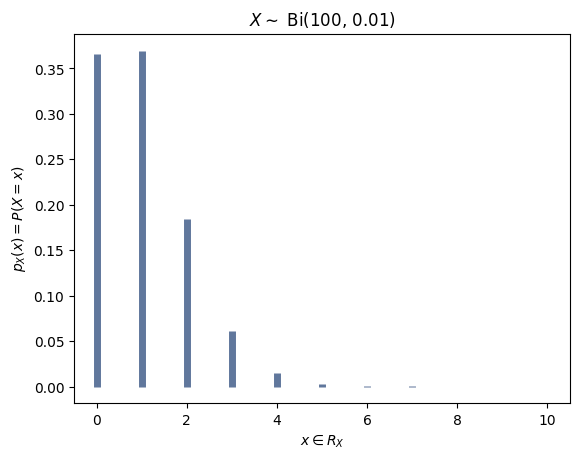

In [ ]:
# Repeticiones independientes
n = 100

# Probabilidad de "éxito"
p = 0.01

# Definimos la binomial
binomial = stats.binom(n, p)

# Rango de X
x = range(0,11)

# Evaluamos la función de probabilidad puntual (fpp) en los x del rango
px = binomial.pmf(x)

# Hacemos un gráfico de la fpp
plt.vlines(x, 0, px, colors='C0', lw=5)
plt.xlabel('$x \in R_X$')
plt.ylabel('$p_X(x)=P(X=x)$')
plt.title(f"$X \sim$ Bi(%d, %.2f)" % (n,p));

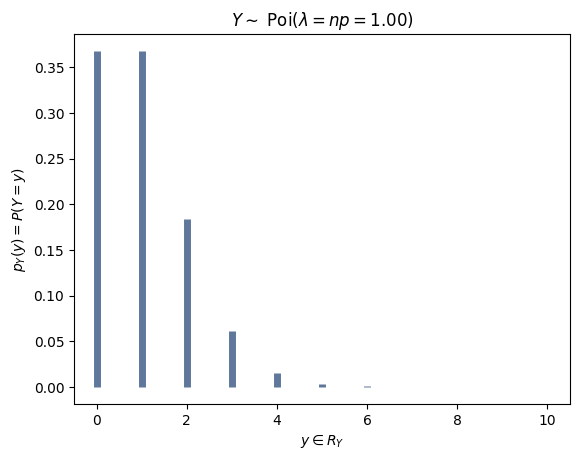

In [ ]:
# Intensidad
lamb = n*p

# Definimos la poisson
poisson = stats.poisson(lamb)

# Rango de X (es N_0, pero como es infinito, podremos solo evaluarla en un rango acotado)
n = 10
x = range(0,n+1)

# Evaluamos la función de probabilidad puntual (fpp) en los x del rango
px = poisson.pmf(x)

# Hacemos un gráfico de la fpp
plt.vlines(x, 0, px, colors='C0', lw=5)
plt.xlabel('$y \in R_Y$')
plt.ylabel('$p_Y(y)=P(Y=y)$')
plt.title(f"$Y \sim$ Poi($\lambda=np=$%.2f)" % (lamb));

Una comparación rápida de ambos gráficos parece sugerir que sus probabilidades puntuales son muy parecidas. Para facilitar la comparación, grafiquemos ambas en un mismo sistema.

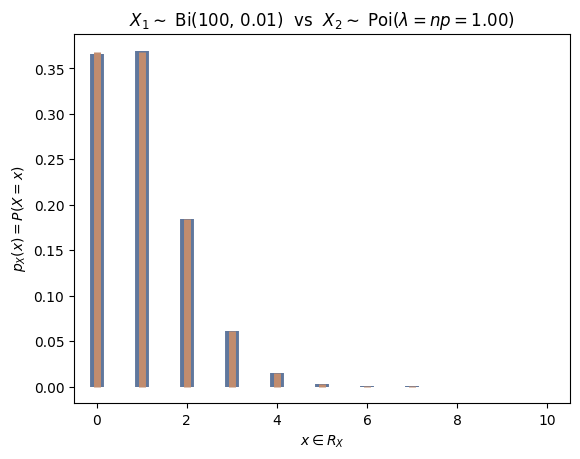

In [ ]:
# Repeticiones independientes
n = 100

# Probabilidad de "éxito"
p = 0.01

# Intensidad
lamb = n*p

# Definimos la binomial y la poisson
binomial = stats.binom(n, p)
poisson = stats.poisson(lamb)

# Rango de X (el mismo para ambas)
x = range(0,11)

# Evaluamos la función de probabilidad puntual (fpp) en los x del rango
px1 = binomial.pmf(x)
px2 = poisson.pmf(x)

# Hacemos un gráfico de la fpp
plt.vlines(x, 0, px1, colors='C0', lw=10)
plt.vlines(x, 0, px2, colors='C1', lw=5)
plt.xlabel('$x \in R_X$')
plt.ylabel('$p_X(x)=P(X=x)$')
plt.title(f"$X_1 \sim$ Bi(%d, %.2f)  vs  $X_2 \sim$ Poi($\lambda=np=$%.2f)" % (n,p,lamb));

Para los parámetros fijados, ¡son casi indistinguibles! Podemos, de hecho, calcular la diferencia entre ambas y ver que, en general, siempre conseguimos aproximación a las milésimas, salvo, quizás, para los primeros elementos del rango.

In [ ]:
# Observemos qué ocurre con las diferencias entre las fpp
# (¡con mucha precisión, ambas fpp difieren muy poco!)
px1-px2

array([-0.0018471 ,  0.0018502 ,  0.0009251 , -0.00031407, -0.0003866 ,
       -0.00016787, -0.00004749, -0.00001013, -0.00000174, -0.00000025,
       -0.00000003])

Más aún, si hacemos esas diferencias en el rango completo de la binomial (de 0 a 100), la precisión es altísima en casi todos lados.

In [ ]:
# Y si lo hacemos en el rango completo de la binomial...
x = range(0,n+1)

# Re-evaluamos la función de probabilidad puntual (fpp) en los x del rango
px1 = binomial.pmf(x)
px2 = poisson.pmf(x)

# ¡La precisión es altísima para los x "grandes"! Es casi 0 la diferencia
px1-px2

array([-0.0018471 ,  0.0018502 ,  0.0009251 , -0.00031407, -0.0003866 ,
       -0.00016787, -0.00004749, -0.00001013, -0.00000174, -0.00000025,
       -0.00000003, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

Para evaluar empíricamente la convergencia como tal (más allá de la aproximación que ya vimos), deberíamos ver qué ocurre cuando $n$ se hace cada vez más grande, y no solo para un $n$ grande arbitrario que hayamos considerado (como lo hicimos acá suponiendo $n=100$).